ICE objectives:
1. identify correct model diagnostic metrics for performance
2. implement at least one model diagnostic metric for a model built for ACA 2 or 3

# Diagnostic Metrics

## Classification

### Confusion matrix
The most common model diagnostic matrix bc of the prevalence of classification tasks. Obtaining the confusion matrix makes other metrics availoable, such as:
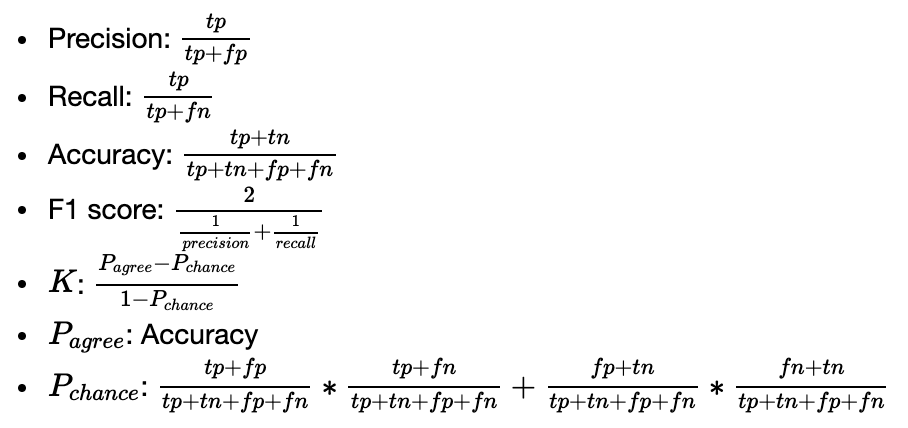

These calculations are easy to do by hand, but scikit learn has implemented all of them under the <mark>sklearn.metric</mark> module [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) and [here](https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/).


### ROC curves and AUC curves
Predicting probabilities of an observation belonging to each class in a classification problem is more flexible than predicting classes directly. The flexibility also creates a trade-off between false positives and false negatives (precision vs recall). ROC Curves and Precision-Recall curves are two useful tools for us to (a) decide an optimal threshold for the decision, and (b) evaluate the classifier more comprehensively.

The main code to use is <mark>roc_curve</mark> and <mark>precision_recall_curve</mark> from <mark>sklearn.metrics</mark>.

*Note*: ROC and AUC are often performed on testing datasets to validate the result.

### K-fold cross validation
In ICE4, we learned how to split datsets into training and testing dataset as a way to prevent overfitting and evaluate the model performance fairly. However, this random split could cause problems, such as getting lucky and ending up with a perfect testing dataset, or having too small a dataset to split for both training and testing. **K-fold cross validation** helps with this.

The training set is split into k smaller sets. For each of the k "folds", follow these steps:

* Use the folds as training data
    - The resulting model is validated on the remaining part of the data (i.e. used as a test set to compute a performance measure such as accuracy)
* The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. Common values are k=3, k=5, and k=10
    - **k=10** is by far the most popular value used in applied machine learning to evaluate models.
    - Studies have shown it provides good trade-off of low computational cost and low bias in an estimate of model performance. 

However, it's also worth noting that this approach can be computationally expensive, but in EDM, we don't often deal with humongous datasets, so k-fold cv is a very good tool.

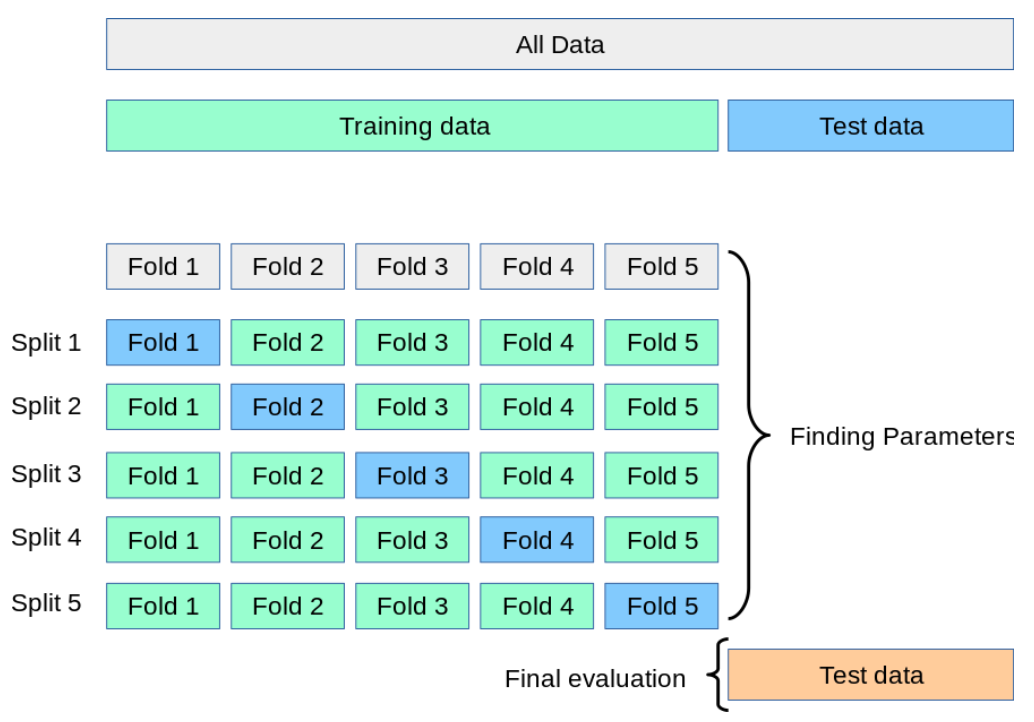

In terms of implementation, it is very well encapsulated in <mark>sklearn</mark>. All you need are **<mark>cross-val_score</mark>** and **<mark>sklearn.model_selection</mark>**. 

[Here is a tutorial for *Cross Validation Using cross_val_score()*](https://www.askpython.com/python/examples/k-fold-cross-validation). (skip the first part of the tutorial about manually implementing K-fold)


### Clustering
Algorithms for structure discovery, on the other hand, have different approaches to evaluate hte performance. Because of the unsupervised nature, we won't be able to compare the results with the ground truth. As a result, we need to find a way to quantify the performance.

#### Silhouette coefficient and silhouette plot
A good example is the silhouette coefficient from ICE5. It uses the mean intra-cluster distance and mean nearest-cluster distance to quantify how well the algorithm has clustered the data points.

Similar to silhouette coefficient, a simpler criterion is known as inertia or within-cluster sum-of-square, which is distance measure of all data points to the assigned cluster centroids.

#### Elbow method
Previously, we plotted multiple silhouette plots to pick the appropriate number of clusters, which can take time and involve a lot of repetition. We can simply automate this process with a loop.

One common implementation of the elbow measure is based on the inertia or the sum of squared distance.

**Sample code - don't run!**

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

clusters_range = [1, 2, 3, 4, 5, 6]

avg_distance=[]

for n in cluster_range:

    clusterer = KMeans(n_clusters = n, random_State = 123). fit(X)
    avg_distance.append(clusterer.inertia_)
    
    
plt.plot(range_n_clusters, avg=distance)

plot.xlabel("Number of Clusters (k)")

plt.ylabel("Distance")

plt.show()

Clearly, the more clusters we have, the less the within-cluster sum-of-square will be bc all data points will be closer to the centroid. Therefore, if we want to maximize our efficiency, we need to pick the value of k, where the average distance falls suddenly. 

Hence, find the elbow point (see figure below). 

It's worth noting that the elbow method is just an empirical method for decision making. There is really no right or wrong for which cluster to choose.

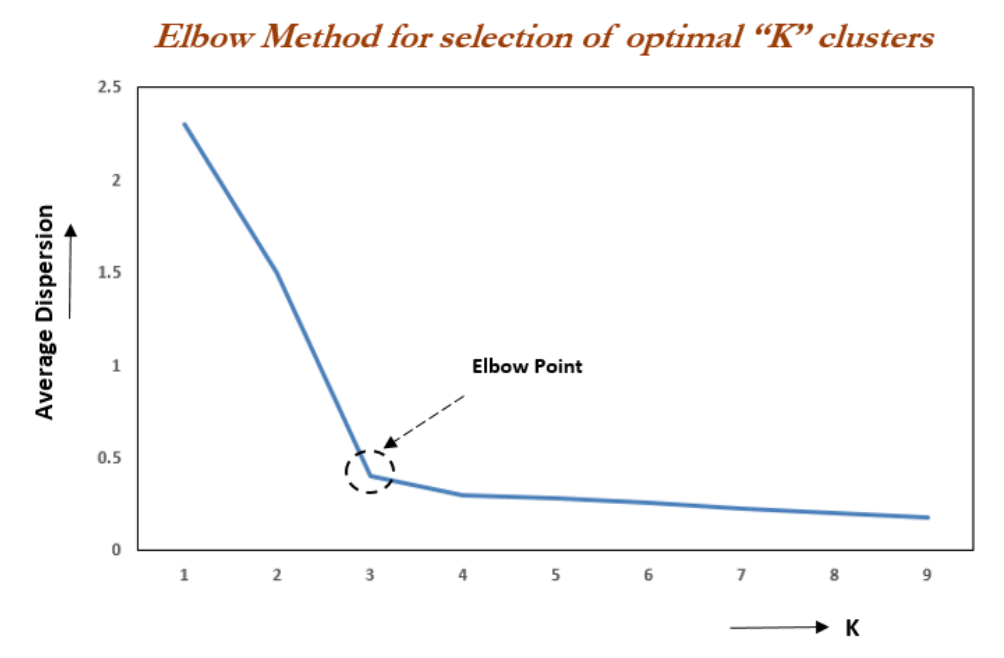

[Learn to implement elbow method with silhouette coefficient](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb)

[Implement elbow method with <mark>yellowbrick</mark>](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

#### Scree plot for PCA
With the same logic, we can evaluate the performance of PCA. We can obtain the variance explained for each dimension. Then we can plot them all on a [*scree plot*](https://en.wikipedia.org/wiki/Scree_plot) to show how much variance each component explains.

In the figure below, we can say we would like the principal components that explain at least 70% of the variance cumulatively. With the first two principal components, the cumulative proportion of the variance explained surpasses 70%, therefore we would consider keeping two principal components. If a higher threshold were used, then additional principal components would have to be retained. 

Alternatively, we can also plot the scree plot in an accumulative way.
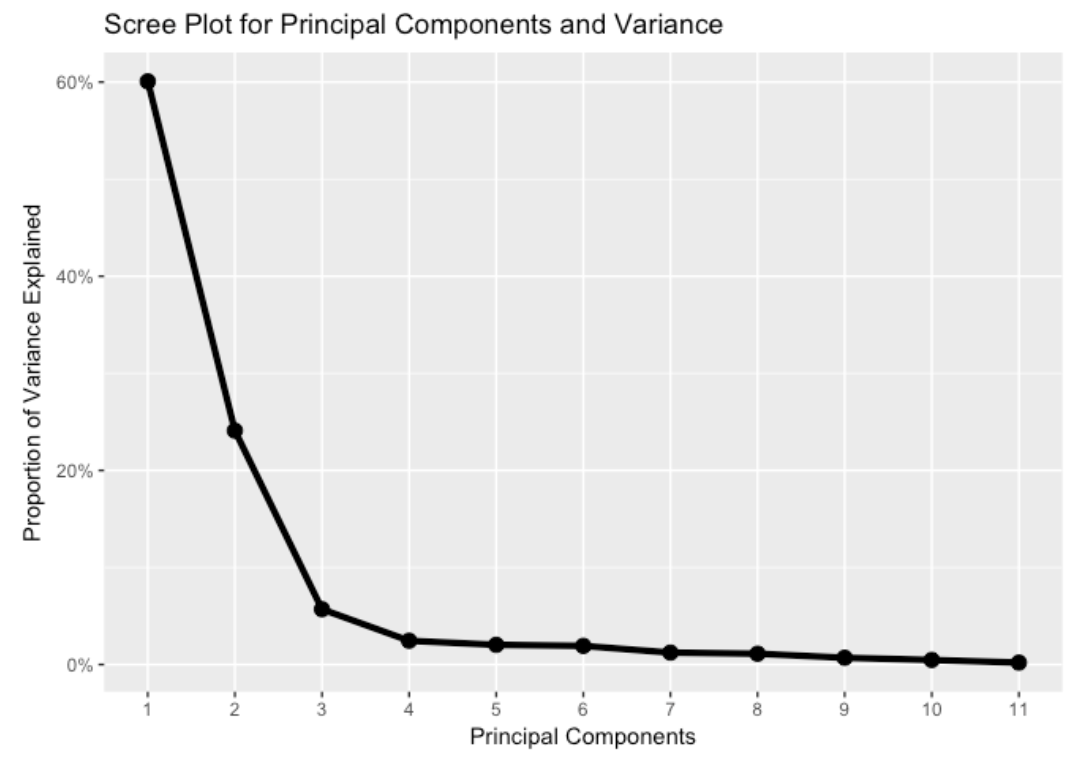

#### Regression
Finally, diagnostic metrics for regressors:
* StatQuest: R-squared, Clearly Explained!!!: https://youtu.be/2AQKmw14mHM
* Vinsloev Academy: MAE and RMSE: https://youtu.be/lHAEPyWNgyY
* Brandon Foltz: Stats 101: Multiple Regression, AIC, AICc, and BIC Basics: https://youtu.be/-BR4WElPIXg
